# Amazon Sales Dataset Recommendation System using Collaborative Filtering and Autoencoders

**Group members:**
- Tasneem Shaheen, 107279
- Mostafa Khalid 106699
- Medhansh Ahuja 105982

The aim for this project is to Build a recommender system to predict user ratings and recommend top products using two approaches: Collaborative Filtering (CF) and Autoencoders.

In [ ]:
#Testttttttttt


## Data Processing
### Load scraped data

**Hello


In [6]:
# For all the imports we have
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('/storage/courses/Lecture1DWF/src/Project/amazon.csv')

In [ ]:
# Display basic info
print(f"Dataset shape: {df.shape}")
print(f"Number of unique products id: {df['product_id'].nunique()}") #

Dataset shape: (1465, 16)
Number of unique products id: 1351


In [ ]:
# Display the first few rows
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
# Get summary statistics for numerical columns
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [ ]:
# Check for missing values in specified columns
print("\nChecking for missing values in user_id, product_id, and rating columns:")
for col in ['user_id', 'product_id', 'rating']:
    missing_values = df[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")


Checking for missing values in user_id, product_id, and rating columns:
Missing values in user_id: 0
Missing values in product_id: 0
Missing values in rating: 0


In [ ]:
# Check for duplicate rows
print("\nChecking for duplicate rows:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Checking for duplicate rows:
Number of duplicate rows: 0


## Data Preprocessing

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [ ]:
products = df[['product_id', 'product_name']].drop_duplicates().set_index('product_id')
data = df[['user_id', 'product_id', 'rating']]

data.head()

,user_id,product_id,rating
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2


### Data Transformation


In [ ]:
#Convert Text IDs to Numeric IDs
user_enc = LabelEncoder()
item_enc = LabelEncoder()

data.loc[:, 'user_id'] = user_enc.fit_transform(data['user_id'])
data.loc[:, 'product_id'] = item_enc.fit_transform(data['product_id'])

data.head()

,user_id,product_id,rating
0,623,346,4.2
1,88,848,4.0
2,849,819,3.9
3,254,643,4.2
4,17,588,4.2


In [ ]:
pivot_table = data.pivot_table(index='user_id', columns='product_id', values='rating')
# Fill missing values in the pivot table with 0
pivot_table = pivot_table.fillna(0)
pivot_table.head()

product_id,0,1,2,3,4,5,6,7,8,9,...,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# First Approach: Collaborative Filtering


In [25]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict


rating_min = data['rating'].min()
rating_max = data['rating'].max()

print(f"Rating scale: [{rating_min}, {rating_max}]")
print(f"Number of ratings: {len(data):,}")
print(f"Number of users: {data['user_id'].nunique():,}")
print(f"Number of products: {data['product_id'].nunique():,}")
# Calculate sparsity - handle potential division by zero if users or items are 0
num_users = data['user_id'].nunique()
num_items = data['product_id'].nunique()
if num_users > 0 and num_items > 0:
    sparsity = (1 - len(data) / (num_users * num_items)) * 100
    print(f"Sparsity: {sparsity:.2f}%")

ModuleNotFoundError: No module named 'surprise'

In [20]:
# Split data into training and testing sets
data = data.dropna(subset=['user_id', 'product_id', 'rating'])
reader = Reader(rating_scale=(data['rating'].min(), data['rating'].max()))
dataset = Dataset.load_from_df(data[['user_id', 'product_id', 'rating']], reader)

trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

# --- Train a single model (SVD) ---
print("\nTraining SVD model...")
model = SVD(n_factors=50, n_epochs=20, random_state=42)
#model = SVD(n_factors=50, random_state=42)
model.fit(trainset)
print("SVD model training complete.")

# --- Evaluate the model ---
print("\nEvaluating model performance...")
predictions = model.test(testset)

# Calculate RMSE
rmse_svd = accuracy.rmse(predictions)



Training SVD model...
SVD model training complete.

Evaluating model performance...
RMSE: 0.2593


# Encoded recomendations

In [22]:
def get_top_n_recommendations(algo, data, user_id, n=5):
    # Get all unique items
    all_items = data['product_id'].unique()

    # Get items the user has already rated
    rated_items = data[data['user_id'] == user_id]['product_id']

    # Predict ratings for unrated items
    predictions = []
    for item in all_items:
        if item not in rated_items.values:
            pred = algo.predict(user_id, item)
            predictions.append((item, pred.est))

    # Sort by predicted rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    return predictions[:n]

# Named Recomendation

In [24]:
def get_named_recommendations(algo, data, user_id, n=5):
    # all numeric product_ids
    all_items = data['product_id'].unique()
    # items the user already rated
    seen = set(data.loc[data['user_id']==user_id, 'product_id'])

    preds = []
    for iid in all_items:
        if iid not in seen:
            est = algo.predict(user_id, iid).est
            preds.append((iid, est))
    preds.sort(key=lambda x: x[1], reverse=True)
    top_n = preds[:n]

    # 3. Inverse‐transform numeric IDs → original product_id
    orig_ids = item_enc.inverse_transform([iid for iid, _ in top_n])
    scores   = [score for _, score in top_n]

    # 4. Look up product names
    results = []
    for pid, score in zip(orig_ids, scores):
        name = products.loc[pid, 'product_name']
        results.append((pid, name, score))
    return results

In [25]:
USER = 1

#top_n_recommendations = get_top_n_recommendations(model, data, user_id=USER, n=5)
#print(f"Top 5 recommendations for user 123: {top_n_recommendations}")
recommendations = get_named_recommendations(model, data, user_id=USER, n=5)
for pid, name, score in recommendations:
    print(f"{pid} — {name}: {score:.3f}")

B0BBW521YC — LAPSTER 12pcs Spiral Cable Protectors for Charger, Wires, Data Charger Cable Protector for Computers, Cell Phones etc.(Grey): 4.397
B08TGG316Z — 10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox: 4.375
B01D5H90L4 — AmazonBasics - High-Speed Male to Female HDMI Extension Cable - 6 Feet: 4.353
B084N133Y7 — Belkin Apple Certified Lightning To Type C Cable, Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters)    White: 4.337
B09W5XR9RT — Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black: 4.335


In [26]:
def precision_recall_at_k(predictions, k=100, threshold=3.5):
    """Return precision and recall at k metrics for each user."""

    user_prediction = defaultdict(list)
    for uid, _, true_rating, estimated, _ in predictions:
        user_prediction[uid].append((estimated, true_rating))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_prediction.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Number of relevant items
        n_relevant = sum((true_rating >= threshold) for (_, true_rating) in user_ratings)
        # Number of recommended items in top k
        n_rec_k = sum((estimated >= threshold) for (estimated, _) in user_ratings[:k])
        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_rating >= threshold) and (estimated >= threshold))
                              for (estimated, true_rating) in user_ratings[:k])
        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_relevant if n_relevant != 0 else 1
    return precisions, recalls

In [27]:
print("\nCalculating Precision@k and Recall@k...")
# Set your desired k and rating threshold for 'relevant' items
K = 2
RATING_THRESHOLD = 3.5 # Assuming a rating of 3.5 or higher is considered 'relevant'

precisions, recalls = precision_recall_at_k(predictions, k=K, threshold=RATING_THRESHOLD)

# Average precision and recall
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)

print(f"Precision@{K}: {avg_precision:.4f}")
print(f"Recall@{K}: {avg_recall:.4f}")


Calculating Precision@k and Recall@k...
Precision@2: 0.9856
Recall@2: 0.9988


# Second Approach: Autoencoders

### *old version of auto encoder*

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Get the number of products (items) and users from the pivot table
num_items = pivot_table.shape[1]
num_users = pivot_table.shape[0]

print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")

# Define the autoencoder model
# Input layer: Represents the user's rating vector for all items
input_layer = keras.Input(shape=(num_items,), name='user_rating')

# Encoder layers: Compresses the input into a lower-dimensional representation (latent space)
# The size of these layers are hyperparameters that can be tuned
encoder = layers.Dense(256, activation='relu', name='encoder_1')(input_layer)
encoder = layers.Dense(128, activation='relu', name='encoder_2')(encoder)
encoder = layers.Dense(64, activation='relu', name='encoder_3')(encoder)

# Decoder layers: Reconstructs the original rating vector from the compressed representation
decoder = layers.Dense(128, activation='relu', name='decoder_1')(encoder)
decoder = layers.Dense(256, activation='relu', name='decoder_2')(decoder)

# Output layer: Should have the same number of units as the input layer (number of items)
# Using 'linear' activation for continuous rating values
output_layer = layers.Dense(num_items, activation='linear', name='decoder_output')(decoder)

# Create the autoencoder model by connecting the input and output layers
autoencoder = keras.Model(inputs=input_layer, outputs=output_layer, name='autoencoder')

# Compile the model
# Using 'adam' optimizer and 'mean squared error' (mse) as the loss function
autoencoder.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
)

Number of users: 1193
Number of items: 1350


In [31]:
# # Display the model summary to see the architecture and number of parameters
print("\nAutoencoder Model Summary:")
autoencoder.summary()

# Train the autoencoder model
# We train the autoencoder to reconstruct the input (user ratings)
# The input and target are the same: the pivot_table
print("\nTraining the Autoencoder Model...")
history = autoencoder.fit(
    pivot_table.values,
    pivot_table.values,
    epochs=50,  # Increased epochs for better training
    batch_size=32,  # Smaller batch size for more stable training
    shuffle=True,
    verbose=1,
    validation_split=0.2  # Use 20% of data for validation
)

print("Autoencoder Model Training Finished.")


Autoencoder Model Summary:


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ user_rating (InputLayer)        │ (None, 1350)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_1 (Dense)               │ (None, 256)            │       345,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_2 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_3 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_1 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_2 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 1350)           │       346,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 775,302 (2.96 MB)

 Trainable params: 775,302 (2.96 MB)

 Non-trainable params: 0 (0.00 B)


Training the Autoencoder Model...
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0140 - val_loss: 0.0148
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - val_loss: 0.0148
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - val_loss: 0.0148
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - val_loss: 0.0148
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - val_loss: 0.0148
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - val_loss: 0.0149
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - val_loss: 0.0149
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - val_loss: 0.0149
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - val_loss: 0.0149
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - val_loss: 0.0149
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - val_loss: 0.0149
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━

### Second Approach: Autoencoders

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Get the number of products (items) and users from the pivot table
num_items = pivot_table.shape[1]
num_users = pivot_table.shape[0]

print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")

# Define the autoencoder model
input_layer = keras.Input(shape=(num_items,), name='user_rating')

encoder = layers.Dense(256, activation='relu', name='encoder_1')(input_layer)
encoder = layers.Dense(128, activation='relu', name='encoder_2')(encoder)
encoder = layers.Dense(64, activation='relu', name='encoder_3')(encoder)

decoder = layers.Dense(128, activation='relu', name='decoder_1')(encoder)
decoder = layers.Dense(256, activation='relu', name='decoder_2')(decoder)

output_layer = layers.Dense(num_items, activation='linear', name='decoder_output')(decoder)

autoencoder = keras.Model(inputs=input_layer, outputs=output_layer, name='autoencoder')

# --- INSERT: masked MSE loss that ignores zeros ---
def masked_mse(y_true, y_pred):
    # mask = 1 where the true rating is non-zero, else 0
    mask = tf.cast(tf.not_equal(y_true, 0.0), dtype=tf.float32)
    # compute squared errors only on observed entries
    se = tf.square((y_true - y_pred) * mask)
    # sum and normalize by number of observed entries
    return tf.reduce_sum(se) / (tf.reduce_sum(mask) + 1e-8)

# Compile with masked loss instead of plain 'mse'
autoencoder.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=masked_mse,
)

print("\nAutoencoder Model Summary:")
autoencoder.summary()

print("\nTraining the Autoencoder Model...")
history = autoencoder.fit(
    pivot_table.values,
    pivot_table.values,
    epochs=50,
    batch_size=32,
    shuffle=True,
    verbose=1,
    validation_split=0.2
)

print("Autoencoder Model Training Finished.")


Number of users: 1193
Number of items: 1350

Autoencoder Model Summary:


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ user_rating (InputLayer)        │ (None, 1350)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_1 (Dense)               │ (None, 256)            │       345,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_2 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_3 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_1 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_2 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 1350)           │       346,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 775,302 (2.96 MB)

 Trainable params: 775,302 (2.96 MB)

 Non-trainable params: 0 (0.00 B)


Training the Autoencoder Model...
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 16.7129 - val_loss: 16.6678
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.2174 - val_loss: 21.4972
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.1647 - val_loss: 17.0452
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2770 - val_loss: 16.8405
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1737 - val_loss: 16.9029
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0824 - val_loss: 16.8983
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6974 - val_loss: 16.9641
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3814 - val_loss: 16.9701
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2520 - val_loss: 16.9640
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2513 - val_loss: 16.9791
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1756 - val_loss: 16.9705
Epoch 12/50
30/30 ━━━━━━━

# Encoded recomdenations

In [35]:
# Function to get Autoencoder-based recommendations for a given user
def get_autoencoder_recommendations(user_id, autoencoder_model, pivot_table, n=10):
    if user_id not in pivot_table.index:
        print(f"User ID '{user_id}' not found in the pivot table.")
        return pd.Series()

    # Get the user's rating vector from the pivot table
    user_ratings = pivot_table.loc[[user_id]].values
    # Predict the ratings for all items using the trained autoencoder model
    predicted_ratings = autoencoder_model.predict(user_ratings, verbose=0).flatten()
    # Create a pandas Series of predicted ratings with product_id as index
    predicted_ratings_series = pd.Series(predicted_ratings, index=pivot_table.columns)
    # Get the list of items already rated by the target user
    user_rated_items = pivot_table.loc[user_id][pivot_table.loc[user_id] > 0].index
    # Drop items already rated by the user from the recommendations
    recommendations = predicted_ratings_series.drop(user_rated_items, errors='ignore')
    # Sort recommendations by predicted rating in descending order
    recommendations = recommendations.sort_values(ascending=False)
    # Return the top N product IDs
    return recommendations.head(n)

# Named recomendation

In [37]:
def get_named_recommendations_autoencoder(user_id, 
                                          autoencoder_model, 
                                          pivot_table, 
                                          item_enc, 
                                          products, 
                                          n=5):

    if user_id not in pivot_table.index:
        raise ValueError(f"User ID {user_id} not in pivot_table")

    # 1. Get user's rating vector and predict reconstructed ratings
    user_vec = pivot_table.loc[[user_id]].values  # shape (1, num_items)
    pred_vec = autoencoder_model.predict(user_vec, verbose=0).flatten()

    # 2. Build a Series of predictions indexed by encoded product_id
    pred_series = pd.Series(pred_vec, index=pivot_table.columns)

    # 3. Exclude items the user has already rated
    seen = pivot_table.loc[user_id][pivot_table.loc[user_id] > 0].index
    pred_series = pred_series.drop(seen, errors='ignore')

    # 4. Select top-n encoded product_ids
    top_n = pred_series.sort_values(ascending=False).head(n)

    # 5. Decode product_ids → original product_id, look up names
    recommendations = []
    for encoded_iid, score in top_n.items():
        orig_pid = item_enc.inverse_transform([encoded_iid])[0]
        name = products.loc[orig_pid, 'product_name']
        recommendations.append((orig_pid, name, float(score)))

    return recommendations


In [38]:

USER = 90
recs = get_named_recommendations_autoencoder(
    user_id=USER,
    autoencoder_model=autoencoder,
    pivot_table=pivot_table,
    item_enc=item_enc,
    products=products,
    n=5
)

for pid, name, score in recs:
    print(f"{pid} — {name}: {score:.2f}")


B07H1S7XW8 — STRIFF Wall Mount Phone Holder Wall Mount with Adhesive Strips, Charging Holder Compatible with iPhone, Smartphone and Mini Tablet (Pack of 1) (White): 5.12
B08KDBLMQP — Croma 500W Mixer Grinder with 3 Stainless Steel Leak-proof Jars, 3 speed & Pulse function, 2 years warranty (CRAK4184, White & Purple): 4.88
B0148NPH9I — Logitech K380 Wireless Multi-Device Keyboard for Windows, Apple iOS, Apple TV Android or Chrome, Bluetooth, Compact Space-Saving Design, PC/Mac/Laptop/Smartphone/Tablet (Dark Grey): 4.87
B09BCNQ9R2 — DYAZO USB 3.0 Type C Female to USB A Male Connector/Converter/Adapter Compatible for Samsung Galaxy Note s 20 10 Plus Ultra,Google Pixel 4 5 3 2 & Other Type-c Devices: 4.64
B08461VC1Z — Scarters Mouse Pad, Desk Mat Extended for Work from Home/Office/Gaming | Vegan PU Leather | Anti-Skid, Anti-Slip, Reversible Splash-Proof – Deskspread ~ Navy Blue & Yellow: 4.62


In [39]:
original_product_id = item_enc.inverse_transform([data.loc[USER, "product_id"]])[0]
product_name = products.loc[original_product_id, 'product_name']
product_name

'Gizga Essentials USB WiFi Adapter for PC, 150 Mbps Wireless Network Adapter for Desktop - Nano Size WiFi Dongle Compatible with Windows, Mac OS & Linux Kernel | WPA/WPA2 Encryption Standards| Black'

### Calculate RMSE

In [41]:
# Calculate RMSE for model evaluation
print("\nEvaluating Model Performance...")

# Reconstruct all ratings using the trained autoencoder
reconstructed_ratings = autoencoder.predict(pivot_table.values, verbose=0)

# Calculate RMSE between original and reconstructed ratings
# Only consider non-zero ratings (actual ratings, not missing values)
original_flat = pivot_table.values.flatten()
reconstructed_flat = reconstructed_ratings.flatten()

# Create mask for non-zero values (actual ratings)
mask = original_flat > 0

# Calculate RMSE only for actual ratings
if np.sum(mask) > 0:
    rmse = np.sqrt(mean_squared_error(original_flat[mask], reconstructed_flat[mask]))
    print(f"Autoencoder RMSE (non-zero ratings only): {rmse:.4f}")
else:
    print("No non-zero ratings found for RMSE calculation")

# Calculate overall RMSE (including zero values)
#overall_rmse = np.sqrt(mean_squared_error(original_flat, reconstructed_flat))
#print(f"Autoencoder RMSE (all values): {overall_rmse:.4f}")


Evaluating Model Performance...
Autoencoder RMSE (non-zero ratings only): 1.8896


### Calculate Precision@k and Recall@k

In [43]:
# Prepare predictions in the format expected by precision_recall_at_k function
# Iterate through each user and their items in the pivot_table
autoencoder_predictions_for_metrics = []
for user_idx, user_id in enumerate(pivot_table.index):
    for product_idx, product_id in enumerate(pivot_table.columns):
        true_rating = pivot_table.iloc[user_idx, product_idx]
        predicted_rating = reconstructed_ratings[user_idx, product_idx]

        # Only include user-item pairs where a true rating exists (i.e., not an unrated item, typically 0 in pivot_table)
        # We assume 0 in pivot_table means unrated, and actual ratings are > 0.
        # If your unrated values are NaN, change `true_rating > 0` to `not pd.isna(true_rating)`
        if true_rating > 0:
            autoencoder_predictions_for_metrics.append((user_id, product_id, true_rating, predicted_rating, None))
# Set your desired k and rating threshold for 'relevant' items for the Autoencoder
K_AE = 10
RATING_THRESHOLD_AE = 3.5 # Assuming a rating of 3.5 or higher is considered 'relevant'

# Calculate Precision@k and Recall@k using the prepared predictions
precisions_ae, recalls_ae = precision_recall_at_k(
    autoencoder_predictions_for_metrics,
    k=K_AE,
    threshold=RATING_THRESHOLD_AE
)

In [44]:
# --- New code for Precision@k and Recall@k for Autoencoder ---
print("\nCalculating Precision@k and Recall@k for Autoencoder model...")
# Average precision and recall for Autoencoder
avg_precision_ae = sum(prec for prec in precisions_ae.values()) / len(precisions_ae)
avg_recall_ae = sum(rec for rec in recalls_ae.values()) / len(recalls_ae)

print(f"Autoencoder Precision@{K_AE}: {avg_precision_ae:.4f}")
print(f"Autoencoder Recall@{K_AE}: {avg_recall_ae:.4f}")


Calculating Precision@k and Recall@k for Autoencoder model...
Autoencoder Precision@10: 0.9983
Autoencoder Recall@10: 0.7524


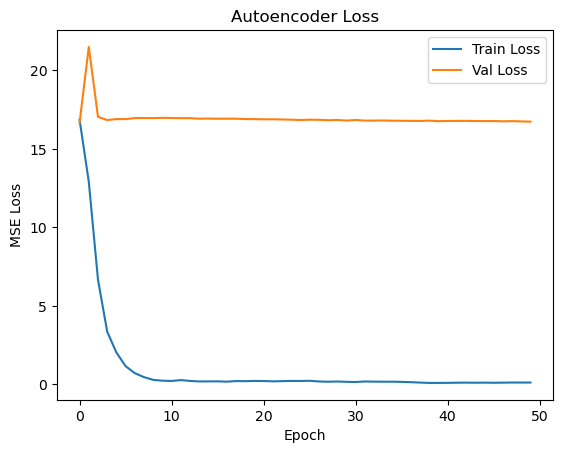

In [45]:
# ## 8. Visualizations
import matplotlib.pyplot as plt
# Plot training loss of autoencoder
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Comparison

In [47]:
# --- 7. Comparison ---
# Use the calculated RMSE and Precision@10 values
svd_rmse = rmse_svd # RMSE from SVD model evaluation
auto_rmse = rmse # RMSE from Autoencoder (non-zero ratings)
svd_prec = avg_precision # Precision@10 for SVD
auto_prec = avg_precision_ae # Precision@10 for Autoencoder
svd_recall = avg_recall # Recall@10 for SVD
auto_recall = avg_recall_ae # Recall@10 for Autoencoder

In [48]:
print("\n" + "=" * 60)
print("MODEL COMPARISON RESULTS")
print("=" * 60)

print("| Model        | Test RMSE | Precision@10 | Recall@10 |")
print("|--------------|-----------|--------------|-----------|")
print(f"| SVD          | {svd_rmse:.4f}    | {svd_prec:.4f}       | {svd_recall:.4f}      |")
print(f"| Autoencoder  | {auto_rmse:.4f}    | {auto_prec:.4f}       | {auto_recall:.4f}      |")



MODEL COMPARISON RESULTS
| Model        | Test RMSE | Precision@10 | Recall@10 |
|--------------|-----------|--------------|-----------|
| SVD          | 0.2593    | 0.9856       | 0.9988      |
| Autoencoder  | 1.8896    | 0.9983       | 0.7524      |


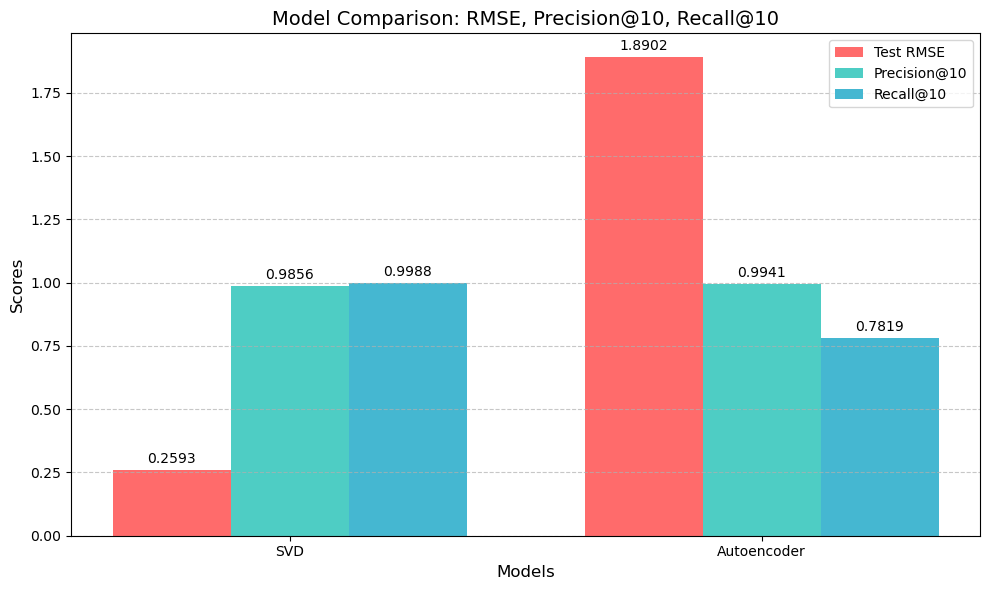

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data (replace with your actual values)
data = {
    "Model": ["SVD", "Autoencoder"],
    "Test RMSE": [0.2593, 1.8902],      # Replace with your RMSE values
    "Precision@10": [0.9856, 0.9941],   # Replace with your Precision@10 values
    "Recall@10": [0.9988, 0.7819]       # Replace with your Recall@10 values
}

df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(df))

# Plot each metric
b1 = ax.bar(index, df["Test RMSE"], bar_width, label="Test RMSE", color="#FF6B6B")
b2 = ax.bar(index + bar_width, df["Precision@10"], bar_width, label="Precision@10", color="#4ECDC4")
b3 = ax.bar(index + 2*bar_width, df["Recall@10"], bar_width, label="Recall@10", color="#45B7D1")

# Add labels and title
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Model Comparison: RMSE, Precision@10, Recall@10", fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(df["Model"])
ax.legend()

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.4f}",
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=10)

for b in [b1, b2, b3]:
    add_labels(b)

plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [50]:
# Additional analysis
print(f"\nDetailed Analysis:")
print(f"- RMSE Difference: {abs(svd_rmse - auto_rmse):.4f}")

if svd_prec > 0 and auto_prec > 0:  # Only compare if both values are valid
    print(f"- Precision@10 Difference: {abs(svd_prec - auto_prec):.4f}")
    if svd_prec > auto_prec:
        print(f"- SVD has {((svd_prec - auto_prec) / auto_prec * 100):.1f}% higher Precision@10")
    else:
        print(f"- Autoencoder has {((auto_prec - svd_prec) / svd_prec * 100):.1f}% higher Precision@10")

if svd_recall > 0 and auto_recall > 0:  # Only compare if both values are valid
    print(f"- Recall@10 Difference: {abs(svd_recall - auto_recall):.4f}")
    if svd_recall > auto_recall:
        print(f"- SVD has {((svd_recall - auto_recall) / auto_recall * 100):.1f}% higher Recall@10")
    else:
        print(f"- Autoencoder has {((auto_recall - svd_recall) / svd_recall * 100):.1f}% higher Recall@10")



Detailed Analysis:
- RMSE Difference: 1.6302
- Precision@10 Difference: 0.0127
- Autoencoder has 1.3% higher Precision@10
- Recall@10 Difference: 0.2464
- SVD has 32.7% higher Recall@10


## 8. Key Differences Between Approaches

| Aspect               | SVD Matrix Factorization               | Autoencoder Neural Model                  |
|----------------------|----------------------------------------|-------------------------------------------|
| Modeling style       | Linear latent-factor model             | Nonlinear deep model                      |
| Data representation  | Sparse user–item matrix                | Same matrix, but encoded through layers   |
| Interpretability     | Higher (latent factors interpretable)  | Lower (deep layers are a black box)       |
| Training speed       | Fast (few parameters)                  | Slower (many weights, backpropagation)    |
| Scalability          | Scales well with large sparse data     | May need more compute and memory          |
| Cold-start           | struggle with it                       | Can integrate side features more naturally|
| Typical use case     | Quick baseline with solid RMSE         | Advanced scenarios needing richer signals |
| Sparsity     | Handles sparse data         | Struggles with sparsity |
		


# Thank you